In [4]:
import pandas as pd
import numpy as np
import seaborn as sns

In [20]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.utils import to_categorical

In [10]:
df=pd.read_csv('C:\\Users\\M\\Downloads\\Bigdata\\adult.txt',header=None)

In [11]:
df

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32557,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32558,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32559,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [12]:
y=df[14]
x=df.drop(14,axis=1)

In [13]:
x_ohe=pd.get_dummies(x, dtype=int)

In [18]:
label=LabelEncoder()
y_enc=label.fit_transform(y)

In [21]:
y_ohe=to_categorical(y_enc)

In [39]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x_ohe=sc.fit_transform(x_ohe.values)

AttributeError: 'numpy.ndarray' object has no attribute 'values'

In [40]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x_ohe,y_ohe,test_size=0.2,random_state=42)

In [41]:
model=Sequential()
model.add(Dense(512,input_dim=108,activation='relu'))
model.add(Dense(256,activation='relu'))
model.add(Dense(128,activation='relu'))
model.add(Dense(64,activation='relu'))
model.add(Dense(32,activation='relu'))
model.add(Dense(16,activation='relu'))
model.add(Dense(2,activation='softmax'))

c:\Users\M\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_20 (Dense)                │ (None, 512)            │        55,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_21 (Dense)                │ (None, 256)            │       131,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_22 (Dense)                │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_23 (Dense)                │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_24 (Dense)                │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_25 (Dense)                │ (None, 16)             │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_26 (Dense)                │ (None, 2)              │            34 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 230,930 (902.07 KB)

 Trainable params: 230,930 (902.07 KB)

 Non-trainable params: 0 (0.00 B)

In [42]:
model.compile(optimizer='adam',metrics=['accuracy'],loss='categorical_crossentropy')

In [43]:
model.fit(x_train,y_train,epochs=100,batch_size=100,validation_data=(x_test,y_test))

Epoch 1/100


261/261 ━━━━━━━━━━━━━━━━━━━━ 7s 9ms/step - accuracy: 0.8129 - loss: 0.3963 - val_accuracy: 0.8415 - val_loss: 0.3325
Epoch 2/100
261/261 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.8521 - loss: 0.3123 - val_accuracy: 0.8555 - val_loss: 0.3177
Epoch 3/100
261/261 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.8553 - loss: 0.3082 - val_accuracy: 0.8577 - val_loss: 0.3127
Epoch 4/100
261/261 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.8585 - loss: 0.3001 - val_accuracy: 0.8546 - val_loss: 0.3207
Epoch 5/100
261/261 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - accuracy: 0.8642 - loss: 0.2922 - val_accuracy: 0.8591 - val_loss: 0.3135
Epoch 6/100
261/261 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.8710 - loss: 0.2802 - val_accuracy: 0.8567 - val_loss: 0.3175
Epoch 7/100
261/261 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.8684 - loss: 0.2808 - val_accuracy: 0.8567 - val_loss: 0.3259
Epoch 8/100
261/261 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.8727 - loss: 0.2728 - val_accuracy: 0.8581

In [44]:
model=Sequential()
model.add(Dense(512,input_dim=108,activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(256,activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(128,activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(64,activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(32,activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(16,activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(2,activation='softmax'))

c:\Users\M\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_27 (Dense)                │ (None, 512)            │        55,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_28 (Dense)                │ (None, 256)            │       131,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_29 (Dense)                │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_30 (Dense)                │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_31 (Dense)                │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_32 (Dense)                │ (None, 16)             │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ (None, 16)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_33 (Dense)                │ (None, 2)              │            34 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 230,930 (902.07 KB)

 Trainable params: 230,930 (902.07 KB)

 Non-trainable params: 0 (0.00 B)

In [45]:
model.compile(optimizer='adam',metrics=['accuracy'],loss='categorical_crossentropy')

In [46]:
model.fit(x_train,y_train,epochs=100,batch_size=100,validation_data=(x_test,y_test))

Epoch 1/100
261/261 ━━━━━━━━━━━━━━━━━━━━ 8s 11ms/step - accuracy: 0.7600 - loss: 0.4771 - val_accuracy: 0.8480 - val_loss: 0.3409
Epoch 2/100
261/261 ━━━━━━━━━━━━━━━━━━━━ 5s 8ms/step - accuracy: 0.8335 - loss: 0.3621 - val_accuracy: 0.8523 - val_loss: 0.3268
Epoch 3/100
261/261 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - accuracy: 0.8428 - loss: 0.3424 - val_accuracy: 0.8532 - val_loss: 0.3348
Epoch 4/100
261/261 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.8443 - loss: 0.3402 - val_accuracy: 0.8600 - val_loss: 0.3174
Epoch 5/100
261/261 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - accuracy: 0.8544 - loss: 0.3234 - val_accuracy: 0.8558 - val_loss: 0.3220
Epoch 6/100
261/261 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.8547 - loss: 0.3138 - val_accuracy: 0.8604 - val_loss: 0.3179
Epoch 7/100
261/261 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - accuracy: 0.8556 - loss: 0.3132 - val_accuracy: 0.8578 - val_loss: 0.3193
Epoch 8/100
261/261 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - accuracy: 0.8560 - loss: 0.3143 - val_acc

In [47]:
from tensorflow.keras.callbacks import ModelCheckpoint,EarlyStopping

In [57]:
model=Sequential()
model.add(Dense(512,input_dim=108,activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(256,activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(128,activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(64,activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(32,activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(16,activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(2,activation='softmax'))

c:\Users\M\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_34 (Dense)                │ (None, 512)            │        55,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_6 (Dropout)             │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_35 (Dense)                │ (None, 256)            │       131,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_7 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_36 (Dense)                │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_8 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_37 (Dense)                │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_9 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_38 (Dense)                │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_10 (Dropout)            │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_39 (Dense)                │ (None, 16)             │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_11 (Dropout)            │ (None, 16)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_40 (Dense)                │ (None, 2)              │            34 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 230,930 (902.07 KB)

 Trainable params: 230,930 (902.07 KB)

 Non-trainable params: 0 (0.00 B)

In [58]:
modelpath = './model/{epoch:02d}-{val_loss:.4f}.keras'
checkpointer = ModelCheckpoint(filepath = modelpath, monitor='val_loss', verbose=1, save_best_only=True)
early_stopping = EarlyStopping(monitor='val_loss', patience=10, verbose=1)

In [60]:
model.compile(optimizer='adam',metrics=['accuracy'],loss='categorical_crossentropy')

In [61]:
his=model.fit(x_train,y_train,epochs=100,batch_size=100,callbacks=[checkpointer,early_stopping],validation_data=(x_test,y_test))

Epoch 1/100
260/261 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7720 - loss: 0.4709
Epoch 1: val_loss improved from inf to 0.33636, saving model to ./model/01-0.3364.keras
261/261 ━━━━━━━━━━━━━━━━━━━━ 8s 10ms/step - accuracy: 0.7722 - loss: 0.4704 - val_accuracy: 0.8458 - val_loss: 0.3364
Epoch 2/100
259/261 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.8301 - loss: 0.3553
Epoch 2: val_loss did not improve from 0.33636
261/261 ━━━━━━━━━━━━━━━━━━━━ 5s 8ms/step - accuracy: 0.8302 - loss: 0.3553 - val_accuracy: 0.8534 - val_loss: 0.3365
Epoch 3/100
255/261 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.8428 - loss: 0.3434
Epoch 3: val_loss improved from 0.33636 to 0.33433, saving model to ./model/03-0.3343.keras
261/261 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.8428 - loss: 0.3433 - val_accuracy: 0.8514 - val_loss: 0.3343
Epoch 4/100
259/261 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.8474 - loss: 0.3279
Epoch 4: val_loss improved from 0.33433 to 0.31829, saving model to ./mod

In [54]:
import matplotlib.pyplot as plt

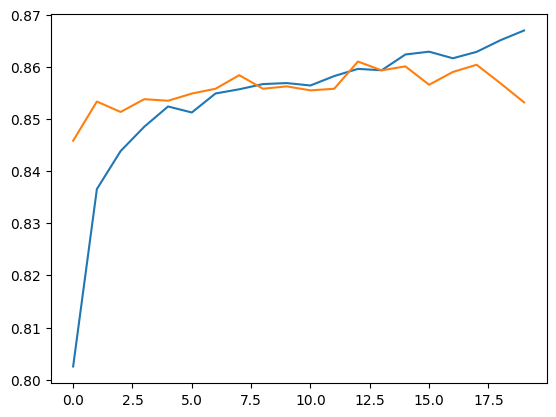

In [62]:
plt.plot(his.history['accuracy'])
plt.plot(his.history['val_accuracy'])